# Golden rule savings rate
(long run interest rate)

In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

To calculate the savings rate in the Solow-Swan model, we need to use the equation for steady state capital per effective worker, which is given by:
```k_star = (s * A * (L / K) ** (1 - alpha) / delta) ** (1 / (alpha - 1))```
where:
*	k_star is the steady state capital per effective worker
*	s is the savings rate
*	A is the level of technology
*	L is the labor force
*	K is the total stock of capital
*	alpha is the share of capital in output
*	delta is the depreciation rate

To solve for s, we can rearrange the above equation as:

```s = ((delta + n + g) / (A * (L / K) ** (1 - alpha))) ** (1 / alpha)```

where:
*	n is the rate of population growth
*	g is the rate of technological progress


In [23]:
def savings_rate(K, L, A, alpha, delta, n, g):
    """
    Calculates the savings rate required to achieve steady state capital per effective worker
    given the values of K, L, A, alpha, delta, n, and g.
    """
    s = ((delta + n + g) / (A * (L / K) ** (1 - alpha))) ** (1 / alpha)
    return s


In [24]:
s = savings_rate(K=100, L=10, A=1, alpha=0.3, delta=0.004, n=0.02, g=0.01)
print(s)

0.0027432352757170665


In [25]:
savings_rate(K = 100, L = 10, A = 1, alpha = 0.5, delta = 0.03, n = 0.01, g=0.02)

0.036

# Data

In [26]:
df = pd.read_excel('pwt1001.xlsx', sheet_name = 'Data')
df.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,emp x avh,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df.columns

Index(['countrycode', 'country', 'currency_unit', 'year', 'rgdpe', 'rgdpo',
       'pop', 'emp', 'avh', 'emp x avh', 'hc', 'ccon', 'cda', 'cgdpe', 'cgdpo',
       'cn', 'ck', 'ctfp', 'cwtfp', 'rgdpna', 'rconna', 'rdana', 'rnna',
       'rkna', 'rtfpna', 'rwtfpna', 'labsh', 'irr', 'delta', 'xr', 'pl_con',
       'pl_da', 'pl_gdpo', 'i_cig', 'i_xm', 'i_xr', 'i_outlier', 'i_irr',
       'cor_exp', 'statcap', 'csh_c', 'csh_i', 'csh_g', 'csh_x', 'csh_m',
       'csh_r', 'pl_c', 'pl_i', 'pl_g', 'pl_x', 'pl_m', 'pl_n', 'pl_k'],
      dtype='object')

In [31]:
df_pan = df[df['country'] == 'Panama']
df_pan.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,emp x avh,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
9240,PAN,Panama,Balboa,1950,2078.012207,1921.755249,0.885651,NaN,NaN,NaN,...,0.106793,-0.400704,0.084311,0.153162,0.131216,0.080722,0.102351,0.090788,0.120985,NaN
9241,PAN,Panama,Balboa,1951,1996.005859,1901.684326,0.908532,NaN,NaN,NaN,...,0.112405,-0.430872,0.064015,0.166374,0.139399,0.074093,0.101690,0.093115,0.132908,NaN
9242,PAN,Panama,Balboa,1952,2187.624023,2050.210449,0.932863,NaN,NaN,NaN,...,0.098670,-0.434843,0.058567,0.156638,0.137192,0.083935,0.108251,0.093171,0.132033,NaN
9243,PAN,Panama,Balboa,1953,2315.174561,2193.881836,0.954802,NaN,NaN,NaN,...,0.091398,-0.359453,0.079405,0.156600,0.137115,0.078497,0.115268,0.100838,0.130280,NaN
9244,PAN,Panama,Balboa,1954,2486.115234,2331.908936,0.977504,NaN,NaN,NaN,...,0.081896,-0.350062,0.066534,0.152390,0.129525,0.080320,0.122086,0.097309,0.121526,NaN


important columns:
* rgdpo = Output-side real GDP at chained PPPs (in mil. 2017USD)
* pop= Population (in millions)
* emp = Number of persons engaged (in millions)
* ccon	 = Real consumption of households and government, at current PPPs (in mil. 2017USD)
* cn = Capital stock at current PPPs (in mil. 2017USD)
* ctfp = TFP level at current PPPs (USA=1)
* cwtfp =  TFP of workers at current PPPs (USA=1)


In [32]:
df_pan = df_pan[['year','rgdpo', 'pop','emp' ,'ccon', 'cn', 'ctfp', 'cwtfp']]
df_pan = df_pan[~df_pan['ctfp'].isna()]
df_pan.reset_index(inplace = True, drop = True)
df_pan.head()

,year,rgdpo,pop,emp,ccon,cn,ctfp,cwtfp
0,1969,6775.033691,1.477365,0.4203,6192.045410,9836.221680,0.937487,1.025832
1,1970,8086.922852,1.519285,0.4343,6954.911621,11342.275391,1.044254,1.129560
2,1971,8992.350586,1.563093,0.4413,7487.617676,12949.618164,1.071301,1.153605
3,1972,9551.375977,1.607796,0.4554,7760.539551,14960.575195,1.027299,1.102712
4,1973,10033.276367,1.653212,0.4641,7904.164551,16842.597656,0.978292,1.047618


Get rates of growth:

* n is the rate of population growth
* g is the rate of technological progress

In [33]:
df_pan['pop_pct'] = df_pan['pop'].pct_change()
df_pan['ctfp_pct'] = df_pan['ctfp'].pct_change()
df_pan['cwtfp_pct'] = df_pan['cwtfp'].pct_change()

df_pan.dropna(inplace = True)
df_pan.reset_index(inplace = True, drop = True)

df_pan['cycle_pop'], df_pan['trend_pop'] = sm.tsa.filters.hpfilter(df_pan['pop_pct'], 100)
df_pan['cycle_ctfp'], df_pan['trend_ctfp'] = sm.tsa.filters.hpfilter(df_pan['ctfp_pct'], 100)
df_pan['cycle_cwtfp'], df_pan['trend_cwtfp'] = sm.tsa.filters.hpfilter(df_pan['cwtfp_pct'], 100)
n = df_pan['trend_pop'].mean()
g = df_pan['trend_ctfp'].mean()
gw = df_pan['trend_cwtfp'].mean()
df_pan['min_r'] = df_pan['trend_pop'] + df_pan['trend_ctfp']
print(n, 'Population growth rate')
print(g, 'Technology growth rate, measured by TFP')

0.021347081796005276 Population growth rate
-0.0019058575789706283 Technology growth rate, measured by TFP


In [34]:
gw

-0.003993691252187456

## Ramsey Cass Koopmans 

La tasa de interés real de largo plazo debe ser mayor que la suma
de la tasa de crecimiento de la población y el cambio técnico la cual, de acuerdo con lo señalado
arriba, podría ser cercana a 3% anual

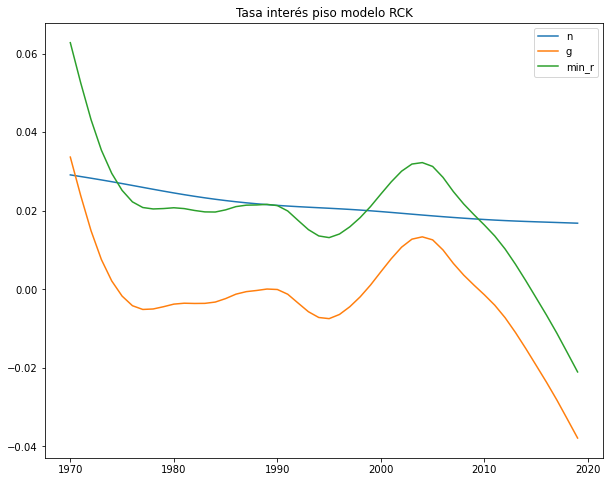

In [19]:
plt.figure(figsize = (10,8))
plt.plot(df_pan.year, df_pan.trend_pop, label = 'n')
plt.plot(df_pan.year, df_pan.trend_ctfp, label = 'g')
plt.plot(df_pan.year, df_pan.min_r, label = 'min_r')
plt.legend()
plt.title('Tasa interés piso modelo RCK')
plt.show()

El piso denominado por la suma del crecimiento de la población y el crecimiento de la tecnología es negativo, por el decrecimiento tecnológico. si asumimos crecimiento tecnológico en 0 el piso es el crecimiento de la población

In [43]:
print('El piso dado por el crecimiento de la población es:', n)

El piso dado por el crecimiento de la población es: 0.021347081796005276


## Replica Banrep

El stock de capital debe tender al estado estacionario, cuando la productividad marginal del capital neta de depreciación tienda a $\rho + \theta g_{A} $,en donde $\rho$, $\theta$ y $g_{A}$ representan, espectivamente, la tasa subjetiva de descuento, la aversión al riesgo y el cambio técnico (crecimiento técnología medido por TFP)

Desigualdad (restricción de prespuesto) intertemporal hace que:
$$\rho + \theta g_{A} > n + g_{A}$$



* $\rho = 3.61$ según paper  https://journals.sagepub.com/doi/pdf/10.1177/1091142119890369

* $\rho =  0.53154$ ,$ 0.70737$  , $0.99163$ según Carlos Esteban Posada https://repository.eafit.edu.co/bitstream/handle/10784/30905/Workingpaper%20Esteban%20Posada.pdf?sequence=2&isAllowed=y

* $\theta= 0.18$ según FED en 2014 https://files.stlouisfed.org/files/htdocs/wp/2014/2014-005.pdf

* $g_{A} = -0.001$ según Penn World Table TFP

In [49]:
rho = 0.0361
theta = 0.18
r_ss = rho + (theta * g)
print('El interés de estado estacionario debería ser al menos',r_ss)

El interés de estado estacionario debería ser al menos 0.035756945635785284
